## First contact with dense_basis and the GP-SFH module:

Creating different shapes using SFH-tuples

In [1]:
import numpy as np
import dense_basis as db
import matplotlib.pyplot as plt

Starting dense_basis. Failed to load FSPS, only GP-SFH module will be available.


In [5]:
Nparam = 1
redshift = 0.0
logMstar = 10.0

Let’s start with an SFH that is rising throughout a galaxy’s lifetime, such as may be expected for high-redshift star forming galaxies. Since we are considering a galaxy with 𝑀∗=10^10𝑀⊙

Since the SFR is rising, we also choose a short t50, since it is rapidly building forming its stars. Running this through the model, we get:

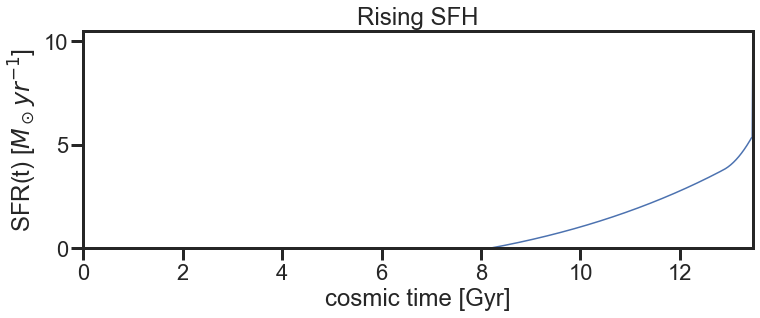

[ 0.          0.01348046  0.02696093  0.04044139  0.05392186  0.06740232
  0.08088279  0.09436325  0.10784372  0.12132418  0.13480464  0.14828511
  0.16176557  0.17524604  0.1887265   0.20220697  0.21568743  0.22916789
  0.24264836  0.25612882  0.26960929  0.28308975  0.29657022  0.31005068
  0.32353115  0.33701161  0.35049207  0.36397254  0.377453    0.39093347
  0.40441393  0.4178944   0.43137486  0.44485533  0.45833579  0.47181625
  0.48529672  0.49877718  0.51225765  0.52573811  0.53921858  0.55269904
  0.56617951  0.57965997  0.59314043  0.6066209   0.62010136  0.63358183
  0.64706229  0.66054276  0.67402322  0.68750368  0.70098415  0.71446461
  0.72794508  0.74142554  0.75490601  0.76838647  0.78186694  0.7953474
  0.80882786  0.82230833  0.83578879  0.84926926  0.86274972  0.87623019
  0.88971065  0.90319112  0.91667158  0.93015204  0.94363251  0.95711297
  0.97059344  0.9840739   0.99755437  1.01103483  1.0245153   1.03799576
  1.05147622  1.06495669  1.07843715  1.09191762  1.

In [3]:
logSFR = 1.0
t50 = 0.6 # t50, lookback time, in Gyr

sfh_tuple = np.hstack([logMstar, logSFR, Nparam, db.scale_t50(t50,redshift)])
sfh, timeax = db.tuple_to_sfh(sfh_tuple, redshift) #timeax in Gyr, SFH in Msun/Yr

fig = db.plot_sfh(timeax, sfh, lookback=False) #notice if lookback or cosmic time
plt.title('Rising SFH')
plt.show()

#notice the SFH is limited in age because of the selected redshift

print(timeax)

Check https://dense-basis.readthedocs.io/en/latest/tutorials/the_gp_sfh_module.html for getting more prototype SFHs

In [4]:
print(sfh)
print(timeax)

[0.00000000e+00 6.11949480e-03 6.81029561e-03 6.73057722e-03
 5.88033636e-03 4.25955672e-03 1.86821620e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

Let's get random SFHs (because I don't want to select always the parameters).


The next step is to generate a template atlas that you will use for fitting. The advantage of doing this is that we trade time-complexity for space, which is usually much more abundant, and it only needs to be done once to fit a large dataset. Before doing this, however, we need a set of priors that we can draw from to generate this atlas. This is done using the db.Priors() class:

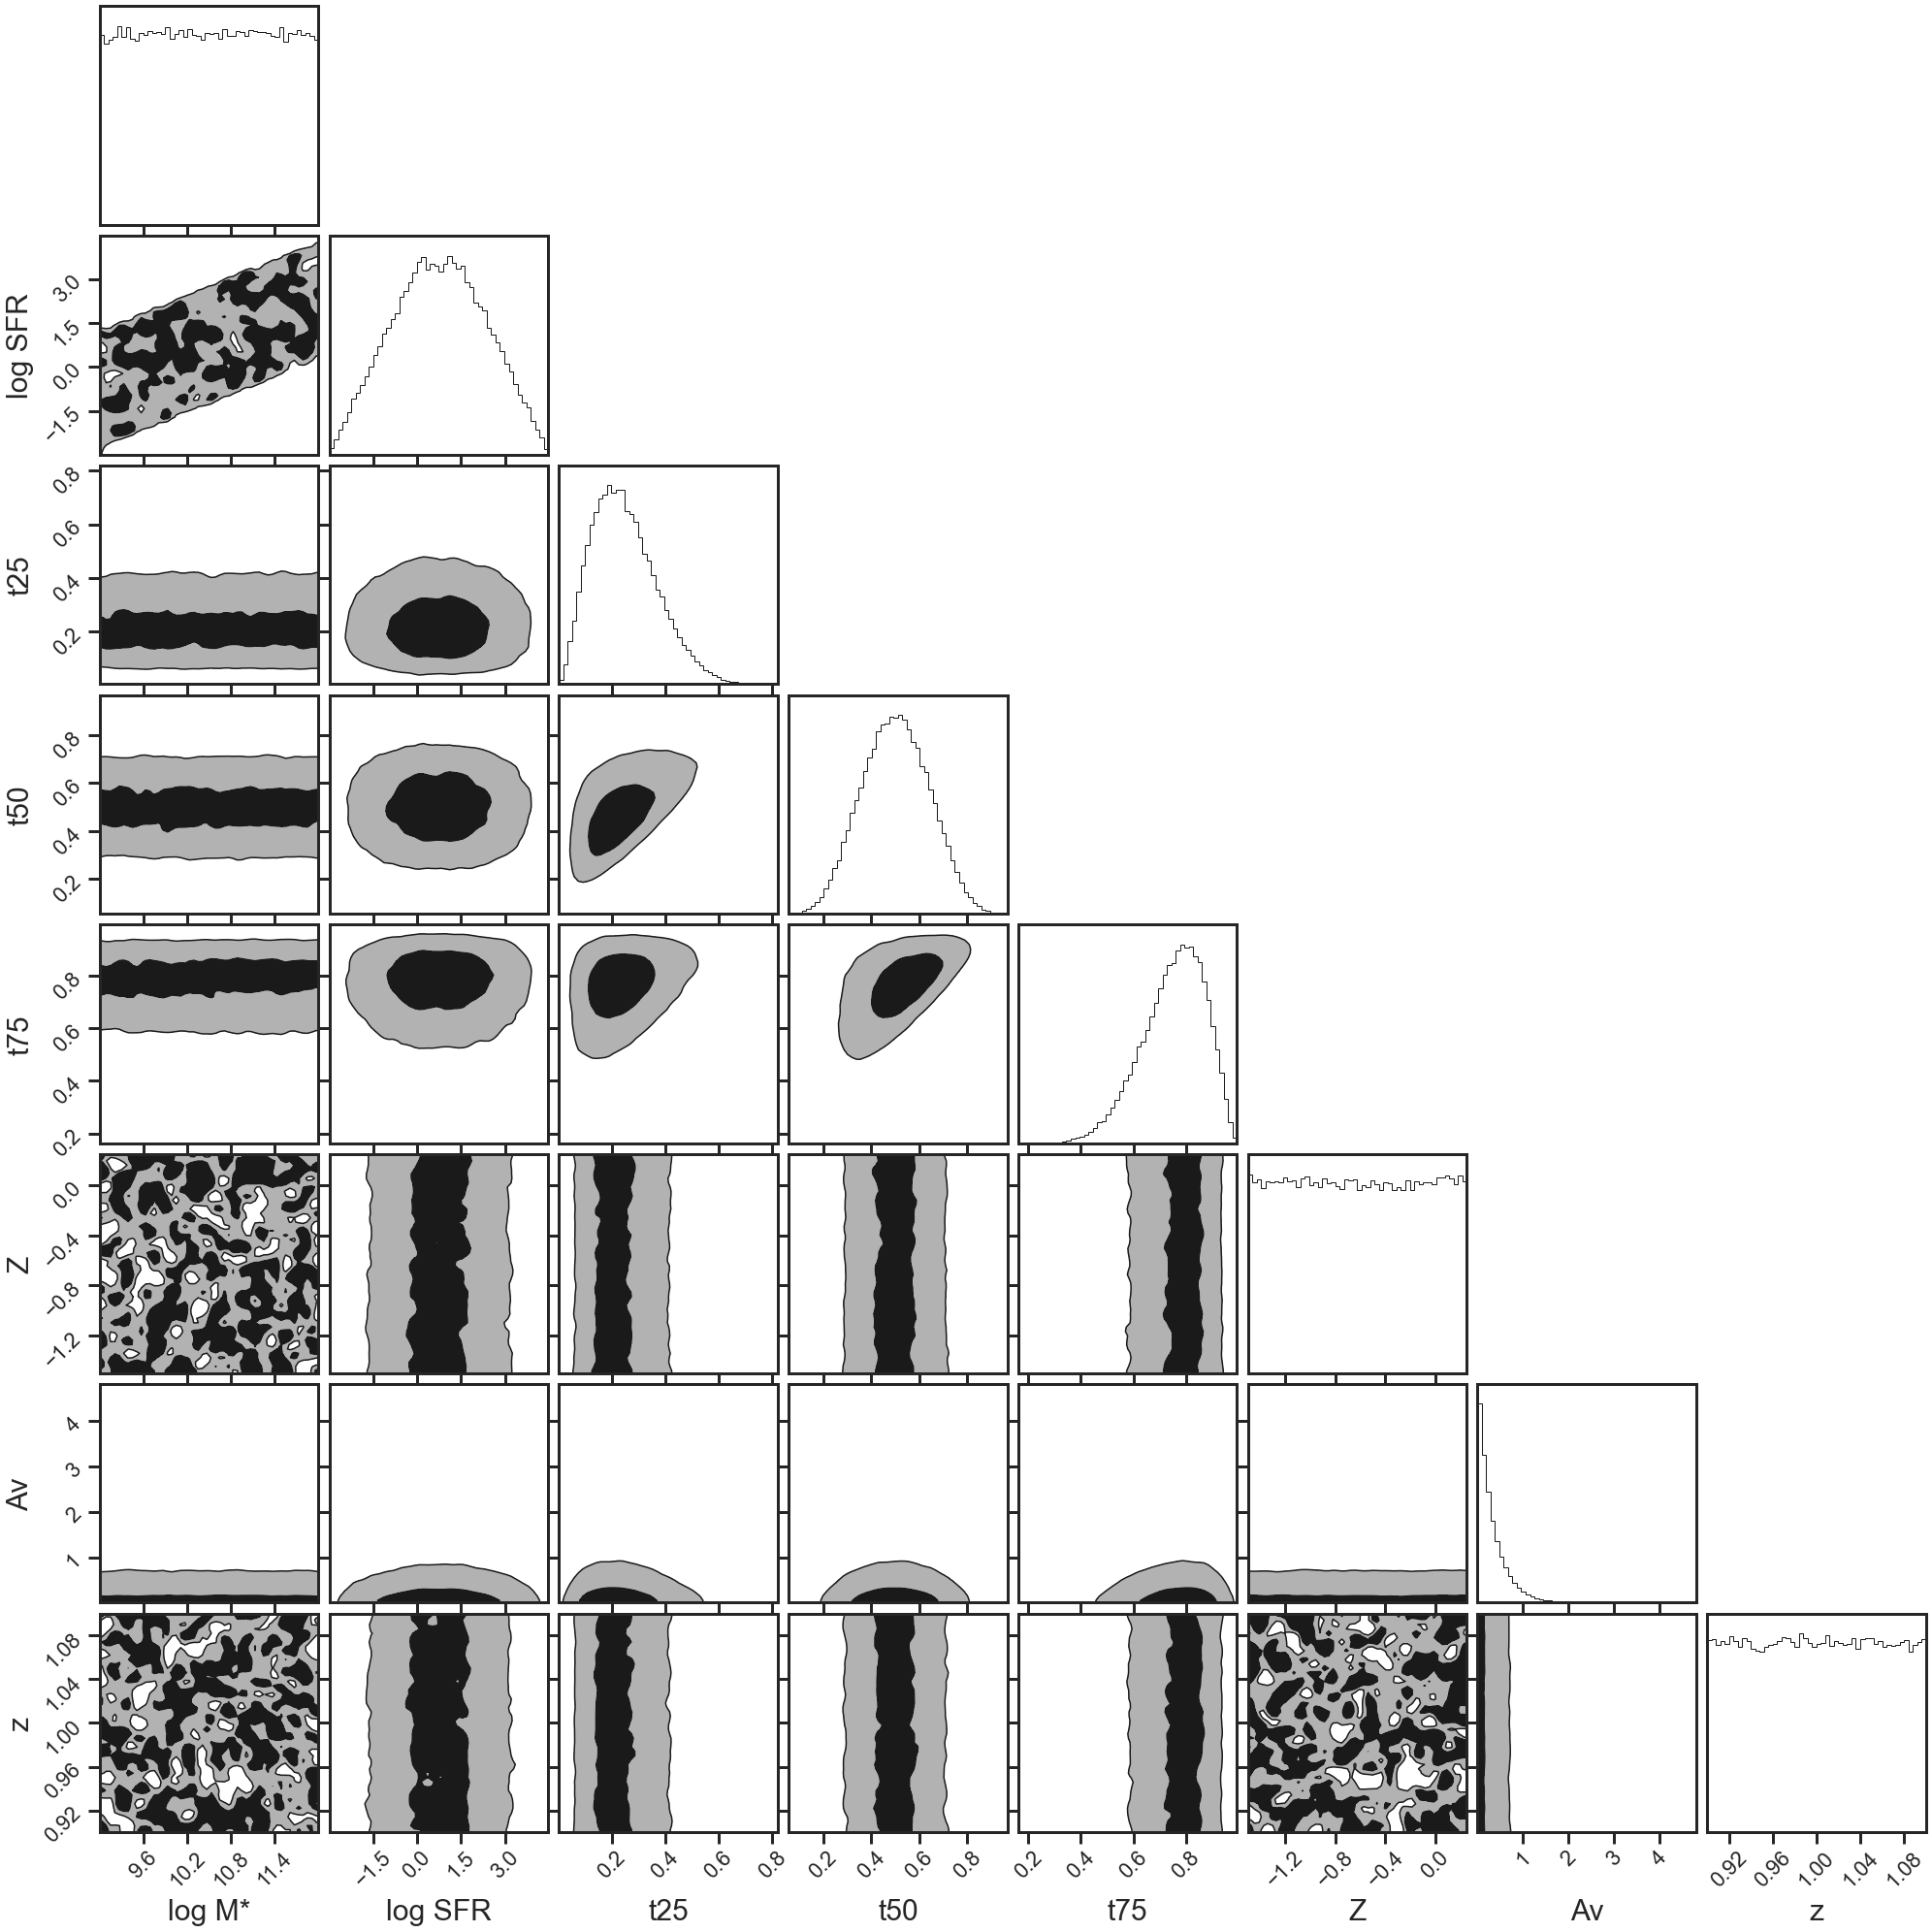

In [5]:
priors = db.Priors()
priors.tx_alpha = 3.0 
priors.plot_prior_distributions()


#tx : lookback times at which a galaxy formed certain fractions of its mass
#concentration (tx_alpha) and number of parameters (Nparam) of distribution

Let’s generate a mock star formation history (SFH) to recover. This can be done by sampling our priors for an SFH-tuple and then converting it to a SFR-vs-time curve using the db.tuple_to_sfh() command.

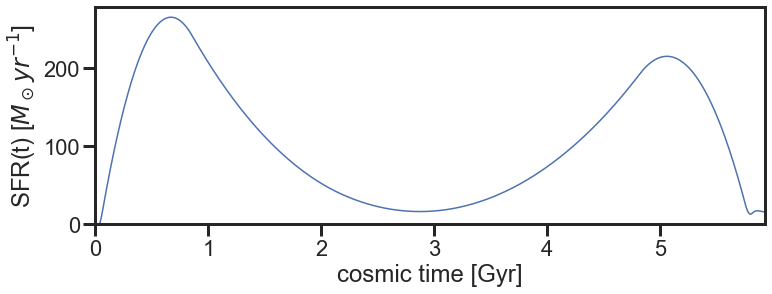

In [6]:
# sample from the prior space to get parameters
rand_sfh_tuple, rand_Z, rand_Av, rand_z = priors.sample_all_params(random_seed = np.random.randint(1000))

# generate an SFH corresponding to the SFH-tuple and see how it looks:

rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = rand_z)
fig = db.plot_sfh(rand_time, rand_sfh, lookback=False)
sfh_truths = [rand_time, rand_sfh]

We do not care about metallicity. This would be included in the spectra given by MILES, not in the SFH.

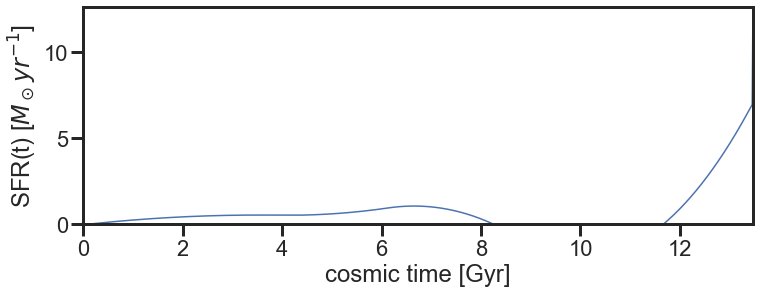

In [75]:
# sample from the prior space to get tuple
rand_sfh_tuple=priors.sample_sfh_tuple()
rand_sfh_tuple[0]=10.0 #logMstar at selected z (in this case z=0)
rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = 0.0) 
fig = db.plot_sfh(rand_time, rand_sfh, lookback=False) #notice max age is 13.5 Gyrs
sfh_truths = [rand_time, rand_sfh]

In [76]:
#print(rand_sfh,rand_time)

print(format(np.sum(rand_sfh)*(rand_time[1]-rand_time[0])*10**9,'1E'))
#notice we are doing Msun/Yr * Gyr * 1e9 so we obtain Msun
#we check the total stellar mass at z=0 is 10**10 (as in our parametric SFHs)

#we confirm the time steps are always the same
print(rand_time[1]-rand_time[0],rand_time[2]-rand_time[1],rand_time[100]-rand_time[99])

1.020915E+10
0.01348046441147335 0.01348046441147335 0.013480464411473214


Let's see if we can get the percentiles (notice we have to change the step of ages and the unit in the SFR). We can fix the mass of the non parametric SFHs and the redshift, but it is not recommended: we want to avoid priors in our training set.

In [36]:
import astropy.units as u
from astropy.cosmology import  Planck13,z_at_value



def z_cosmic(t):
    #receives cosmic time, returns redshit
    return z_at_value(Planck13.age,t*u.Gyr).value
def t_cosmic(z):
    #receives redsfit, returns cosmic time
    return (Planck13.age(0)-Planck13.lookback_time(z)).value


def sample_z_prior(zmin,zmax,size=1):
        #if uniform, like in dense_basis, not uniformly_distributed in time
        #zval = np.random.uniform(size=size)*(z_max-z_min) + z_min
        tmax=t_cosmic(zmax)
        tmin=t_cosmic(zmin)
        tval=np.random.uniform(size=size)*(tmax-tmin) + tmin
        zval=z_cosmic(tval)
        return zval


def generate_weights_from_SFHs_non_param(n,percen=True,zfix=False,mfix=False,logMstar=10.0):
    priors = db.Priors()
    #priors.z_min=0.0
    #priors.z_max=8.0
    curves=[]
    times=[] #needed because rand_time length and step depends on the redshift

    priors.mass_max = 18.0
    priors.mass_min = 10.0

    if zfix==False:
        #z=priors.sample_z_prior(size=n) not recommended because samples uniformly in z, not in t
        z=sample_z_prior(zmin=0,zmax=z_cosmic(1),size=n) #uniformly distributed in cosmic time, we set zmax as 1 gyr (form all the stellar mass before 1 gyr)
    else:
        z=np.zeros((n,)) #present time

    r=np.random.rand(n)
    for i in range(n):
        rand_sfh_tuple=priors.sample_sfh_tuple()
        if mfix:
            rand_sfh_tuple[0]=logMstar #logMstar at selected z
        rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = z[i]) 
        if r[i]<0.5:
            rand_sfh=rand_sfh[::-1]

        curves.append(rand_sfh*1e9) #conversion from Msun/yr to Msun/Gyr
        times.append(rand_time)

    
    ms=[]
    #non accumulative mass curves, we save it cause we will use it later
    for index,curve in enumerate(curves):        
        sfr_0=curve
        m=[]
        t=times[index]
        #print(t)
        step=t[1]-t[0]
        #print(step)
        for i,tx in enumerate(t):  
             m_t=sfr_0[i]*step #this gives directly the mass curve (non accumulative)
             m.append(m_t)
        ms.append(m/np.sum(m)) #normalized (weigths!!)

    if percen:
        #compute percentiles
        percentiles=[]
        for i,curve in enumerate(curves):
             mcurve=ms[i]
             m=[]
             percent=[]
             for j in range(len(mcurve)):
                m.append(np.sum(mcurve[:j+1]))
             for k in range(1,10):
                ind=np.argmin(abs(np.array(m)-k/10))
                percent.append(times[i][ind])
             percentiles.append(percent)  
        return np.array(times),np.array(ms),np.array(percentiles)
    else:
        return np.array(times),np.array(ms)

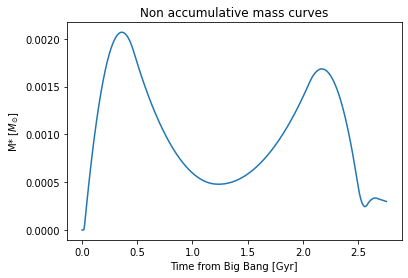

0.9999999999999999


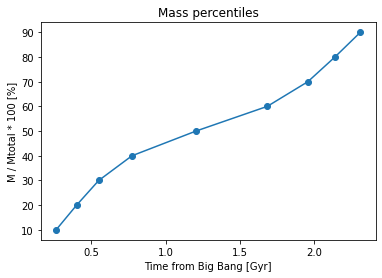

1000


In [33]:
n=1
t,ms,percentiles=generate_weights_from_SFHs_non_param(n)

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
    plt.title('Non accumulative mass curves')
    plt.ylabel('M* [$M_{\\odot}$]')
    plt.xlabel('Time from Big Bang [Gyr]')
    plt.show()
    print(np.sum(ms[i,:]))
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
    plt.title('Mass percentiles')
    plt.xlabel('Time from Big Bang [Gyr]')
    plt.ylabel('M / Mtotal * 100 [%]')
    plt.show()

print(len(t[0]))

Now we are ready to check how are models trained with parametric SFHs work with these little babies. Probably not really well, but next step will be to train our model with them so it gets much more flexible.

Try to balance the dataset to get as many old galaxies as young ones

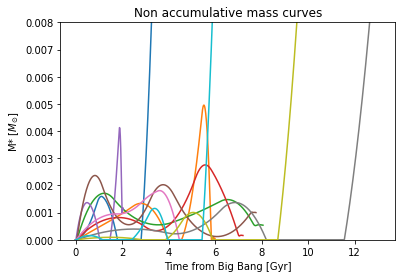

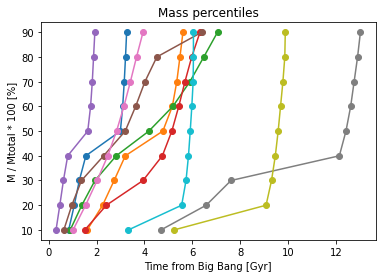

[[0.00000000e+00 3.28897139e-03 6.57794278e-03 ... 3.27910448e+00
  3.28239345e+00 3.28568242e+00]
 [0.00000000e+00 5.99594133e-03 1.19918827e-02 ... 5.97795351e+00
  5.98394945e+00 5.98994539e+00]
 [0.00000000e+00 8.06367450e-03 1.61273490e-02 ... 8.03948347e+00
  8.04754715e+00 8.05561082e+00]
 ...
 [0.00000000e+00 1.30998475e-02 2.61996950e-02 ... 1.30605479e+01
  1.30736478e+01 1.30867476e+01]
 [0.00000000e+00 9.89407368e-03 1.97881474e-02 ... 9.86439146e+00
  9.87428554e+00 9.88417961e+00]
 [0.00000000e+00 6.05460093e-03 1.21092019e-02 ... 6.03643713e+00
  6.04249173e+00 6.04854633e+00]]


In [8]:
#if we avoid the mass fix? Weights are always normalized. z no fixed


n=10
t,ms,percentiles=generate_weights_from_SFHs_non_param(n) #random mass

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylim(0,0.008)
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()

print(t)


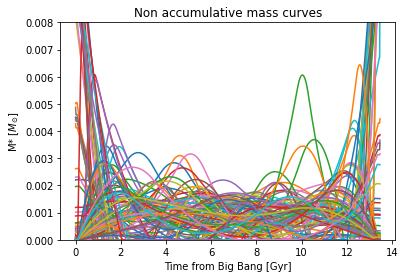

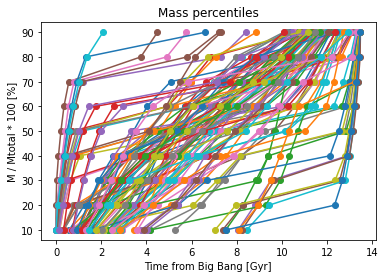

In [39]:
#the same but zfixed

n=100
t,ms,percentiles=generate_weights_from_SFHs_non_param(n,zfix=True) #random mass

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylim(0,0.008)
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()



In [16]:

n=1000
t,ms,percentiles=generate_weights_from_SFHs_non_param(n,mfix=True) #fixed mass

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylim(0,0.008)
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()


#it seems that when we fix the mass to 10**10 we tend to have young galaxies



KeyboardInterrupt: 

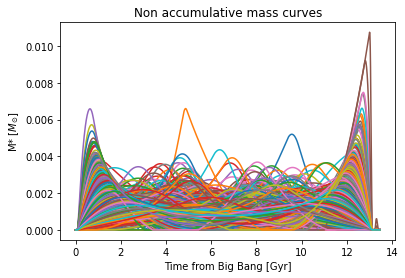

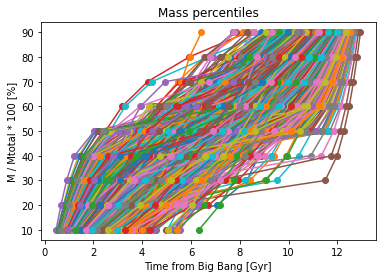

In [12]:
#what if we fix the mass to 10**14


n=1000
t,ms,percentiles=generate_weights_from_SFHs_non_param(n,mfix=True,logMstar=16,z=0.0) #fixed mass

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()

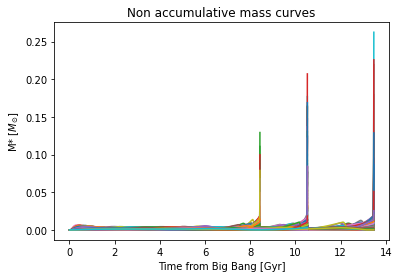

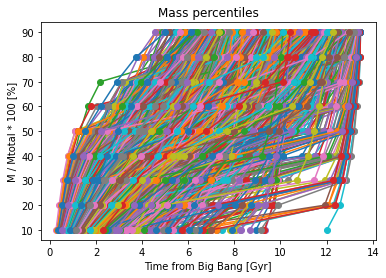

In [23]:
#what if we fix the mass to 10**14
#what if we change redshift

n=1000
t,ms,percentiles=generate_weights_from_SFHs_non_param(n,mfix=True,logMstar=12,z=0.5) #fixed mass

t_2,ms_2,percentiles_2=generate_weights_from_SFHs_non_param(n,mfix=True,logMstar=12,z=0.0) #fixed mass

t_3,ms_3,percentiles_3=generate_weights_from_SFHs_non_param(n,mfix=True,logMstar=12,z=0.25) #fixed mass
for i in range(n):
    plt.plot(t[i,:],ms[i,:])
    plt.plot(t_2[i,:],ms_2[i,:])
    plt.plot(t_3[i,:],ms_3[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
    plt.plot(percentiles_2[i,:],np.arange(10,100,10),'-o')
    plt.plot(percentiles_3[i,:],np.arange(10,100,10),'-o')
    
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()




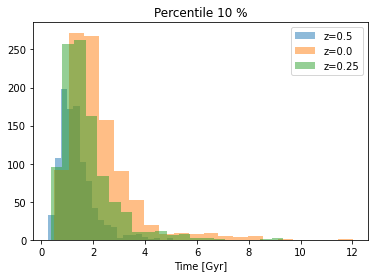

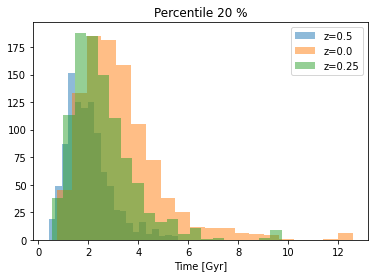

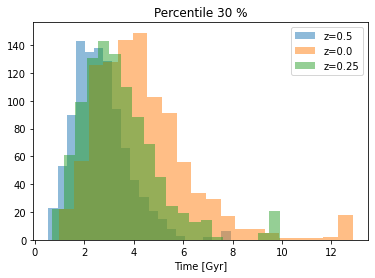

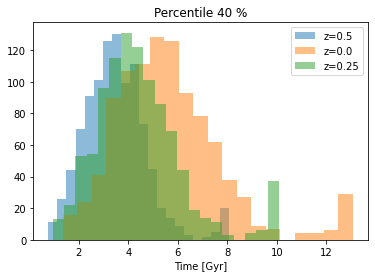

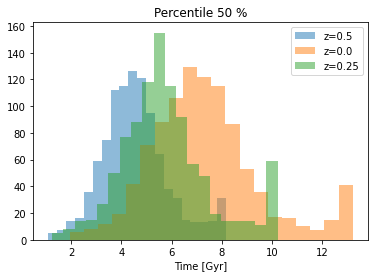

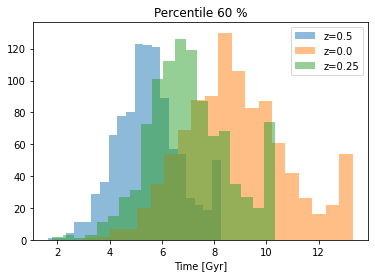

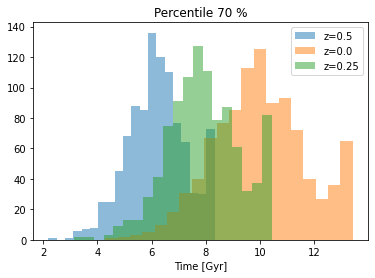

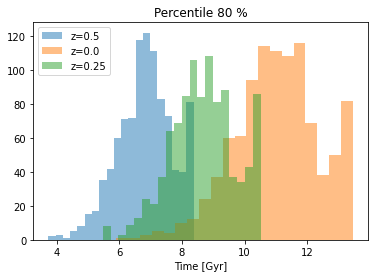

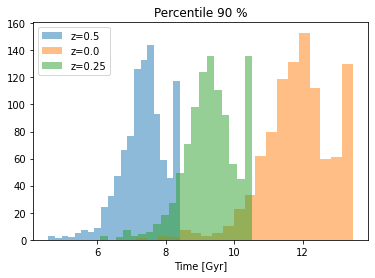

In [24]:
for i in range(9):
    plt.hist(percentiles[:,i],bins=20,alpha=0.5,label='z=0.5')
    plt.hist(percentiles_2[:,i],bins=20,alpha=0.5,label='z=0.0')
    plt.hist(percentiles_3[:,i],bins=20,alpha=0.5,label='z=0.25')
    plt.title('Percentile '+str((i+1)*10)+' %')
    plt.xlabel('Time [Gyr]')
    plt.legend()
    plt.show()

In [2]:
def generate_weights_from_SFHs_non_param_several(n,logMstar=[12,14,16],z=[0.0,0.25,0.5],percen=True):
    priors = db.Priors()
    curves=[]
    times=[] #not needed because if we fix z all rand_time are exactly the same
    nx=int(n/(len(z)*len(logMstar)))
    a=0
    for j in range(len(z)):
        for k in range(len(logMstar)):
            for i in range(nx):
                rand_sfh_tuple=priors.sample_sfh_tuple()
                rand_sfh_tuple[0]=logMstar[k] #logMstar at selected z (in this case z=0)
                rand_sfh, rand_time = db.tuple_to_sfh(rand_sfh_tuple, zval = z[j]) 
                curves.append(rand_sfh*1e-9) #conversion from Msun/yr to Msun/Gyr
                times.append(rand_time)
                a+=1
                print(a)
    
    ms=[]
    #non accumulative mass curves, we save it cause we will use it later
    for index,curve in enumerate(curves):        
        sfr_0=curve
        m=[]
        t=times[index]
        step=t[1]-t[0]
        for i,tx in enumerate(t):  
             m_t=sfr_0[i]*step #this gives directly the mass curve (non accumulative)
             m.append(m_t)
        ms.append(m/np.sum(m)) #normalized (weigths!!)

    if percen:
        #compute percentiles
        percentiles=[]
        for i,curve in enumerate(curves):
             mcurve=ms[i]
             m=[]
             percent=[]
             for j in range(len(mcurve)):
                m.append(np.sum(mcurve[:j+1]))
             for k in range(1,10):
                ind=np.argmin(abs(np.array(m)-k/10))
                percent.append(times[i][ind])
             percentiles.append(percent)  
        return np.array(times),np.array(ms),np.array(percentiles)
    else:
        return np.array(times),np.array(ms)




In [3]:
n=900
t,ms,percentiles=generate_weights_from_SFHs_non_param_several(n,logMstar=[16]) #fixed mass


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


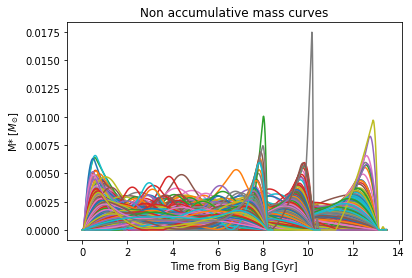

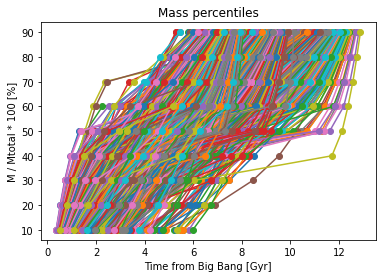

In [5]:
for i in range(900):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.show()

for i in range(900):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
    
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


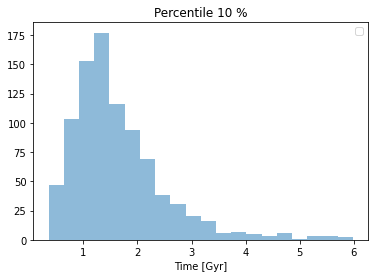

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


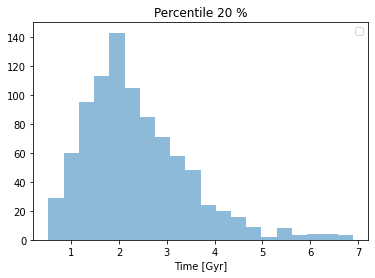

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


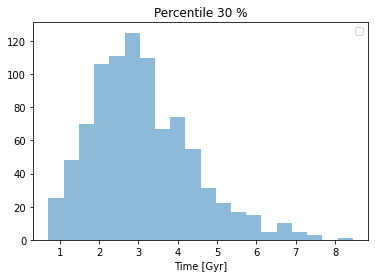

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


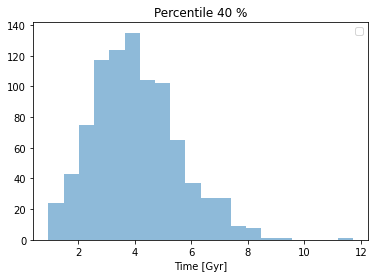

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


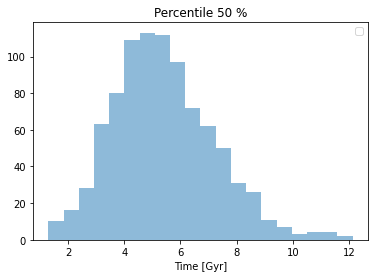

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


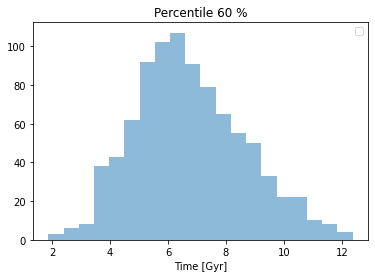

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


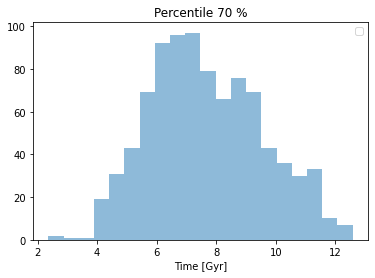

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


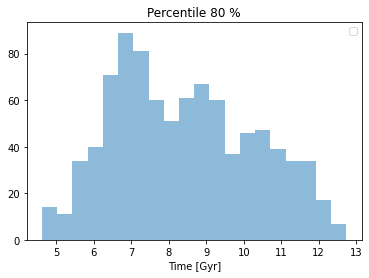

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


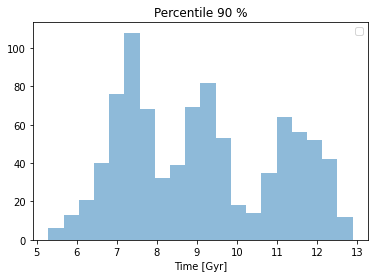

In [6]:
for i in range(9):
    plt.hist(percentiles[:,i],bins=20,alpha=0.5)

    plt.title('Percentile '+str((i+1)*10)+' %')
    plt.xlabel('Time [Gyr]')
    plt.legend()
    plt.show()

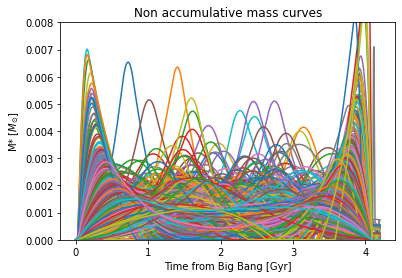

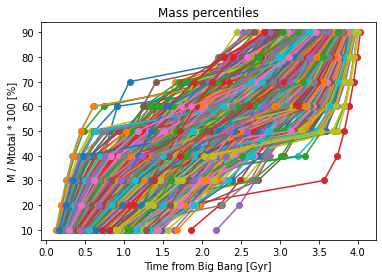

In [10]:
n=1000
t,ms,percentiles=generate_weights_from_SFHs_non_param(n,mfix=True,logMstar=14,z=1.5) #fixed mass

for i in range(n):
    plt.plot(t[i,:],ms[i,:])
plt.title('Non accumulative mass curves')
plt.ylabel('M* [$M_{\\odot}$]')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylim(0,0.008)
plt.show()

for i in range(n):
    plt.plot(percentiles[i,:],np.arange(10,100,10),'-o')
plt.title('Mass percentiles')
plt.xlabel('Time from Big Bang [Gyr]')
plt.ylabel('M / Mtotal * 100 [%]')
plt.show()
